In [12]:
%matplotlib inline
%pylab inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from inforet_package.preprocessing import *
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
tqdm.pandas()

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#loading data
df = pd.read_csv("../data/train.csv")

In [3]:
def print_datasets_info(df):
    print("{} rows loaded...".format(df.shape[0]))
    print("columns are: {}".format(list(df.columns)))
    print("{0:.2f}% of sincere questions".format(len(df[df['target'] == 0])*100/df.shape[0]))
    print("{0:.2f}% of insincere questions".format(len(df[df['target'] == 1])*100/df.shape[0]))

reducted_df = df.sample(frac=0.2)
print_datasets_info(reducted_df)

261224 rows loaded...
columns are: ['qid', 'question_text', 'target']
93.88% of sincere questions
6.12% of insincere questions


In [4]:
reducted_df['double'] = reducted_df['question_text'].progress_apply(lambda x: sentiment_pattern(x))

In [5]:
reducted_df['polarity'] = [d[0] for d in tqdm(reducted_df.double)]
reducted_df['subjectivity'] = [d[1] for d in tqdm(reducted_df.double)]
reducted_df = reducted_df.drop('double', 1)

In [13]:
reducted_df['double'] = reducted_df['question_text'].progress_apply(lambda x: get_modality_mood(x))

In [14]:
reducted_df['modality'] = [d[0] for d in tqdm(reducted_df.double)]
reducted_df['mood'] = [d[1] for d in tqdm(reducted_df.double)]
reducted_df = reducted_df.drop('double', 1)

In [24]:
sincere_questions = reducted_df[reducted_df['target'] == 0]
insincere_questions = reducted_df[reducted_df['target'] == 1]

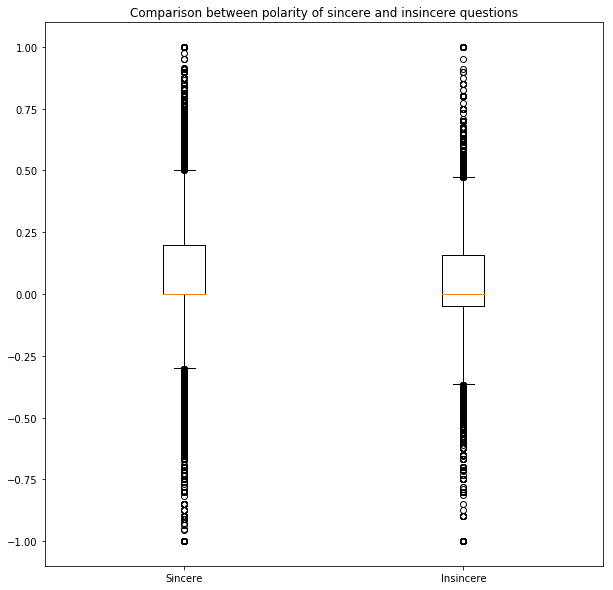

0.0
0.0


In [7]:
def boxplot_print(df_sincere, df_insincere, column):
    fig = plt.figure(1, figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.boxplot([df_sincere[column], df_insincere[column]])
    ax.set_xticklabels(['Sincere', 'Insincere'])
    ax.set_title('Comparison between {} of sincere and insincere questions'.format(column))
    plt.show()

boxplot_print(sincere_questions, insincere_questions, 'polarity')
print(sincere_questions['polarity'].median())
print(insincere_questions['polarity'].median())

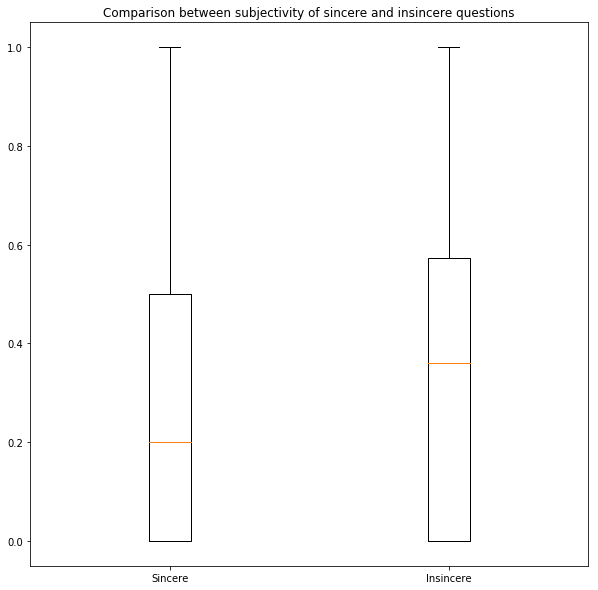

0.2
0.3611111111111111


In [8]:
boxplot_print(sincere_questions, insincere_questions, 'subjectivity')
print(sincere_questions['subjectivity'].median())
print(insincere_questions['subjectivity'].median())

In [ ]:
boxplot_print(sincere_questions, insincere_questions, 'modality')
print(sincere_questions['modality'].median())
print(insincere_questions['modality'].median())

In [47]:
sincere_size = sincere_questions.shape[0]
sincere_perc = sincere_questions.groupby(['mood']).size().apply(lambda x: (x/sincere_size)*100)

insincere_size = insincere_questions.shape[0]
insincere_perc = insincere_questions.groupby(['mood']).size().apply(lambda x: (x/insincere_size)*100)

print(sincere_perc)

mood
conditional     0.509314
imperative      0.285036
indicative     99.193417
subjunctive     0.012233
dtype: float64


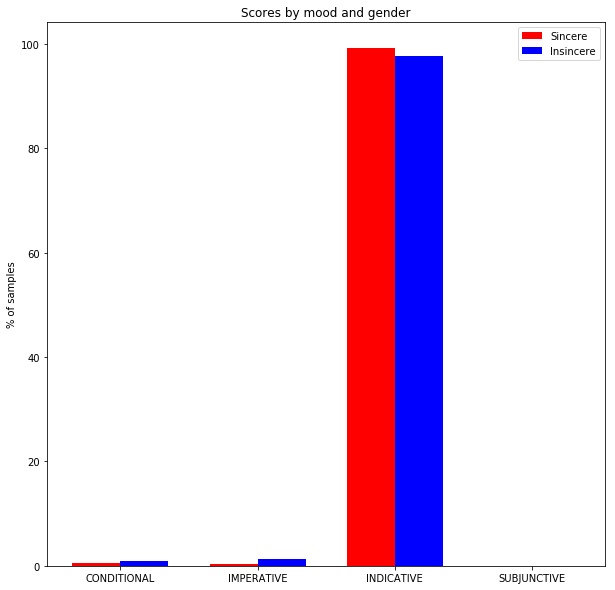

In [48]:
def print_bar_chart(sincere_percentage, insincere_percentage):
    l_sinc = len(sincere_percentage)
    l_insinc = len(insincere_percentage)
    assert l_sinc == l_insinc
    fig = plt.figure(1, figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    ind = np.arange(l_sinc)
    width = 0.35
    rects1 = ax.bar(ind, sincere_percentage, width, color='r')
    rects2 = ax.bar(ind + width, insincere_percentage, width, color='b')
    ax.set_ylabel('% of samples')
    ax.set_title('Scores by mood and gender')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('CONDITIONAL', 'IMPERATIVE', 'INDICATIVE', 'SUBJUNCTIVE'))

    ax.legend((rects1[0], rects2[0]), ('Sincere', 'Insincere'))
    plt.show()

print_bar_chart(sincere_perc.tolist(), insincere_perc.tolist())